# Introductions to Regression with Neural Networks in tensorflow

There are may definitios for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [1]:
# Inport tensorflow
import tensorflow as tf

2023-12-22 18:29:18.266038: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-22 18:29:18.268350: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-22 18:29:18.301254: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-22 18:29:18.301285: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-22 18:29:18.302560: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

## Creating data to view and fit

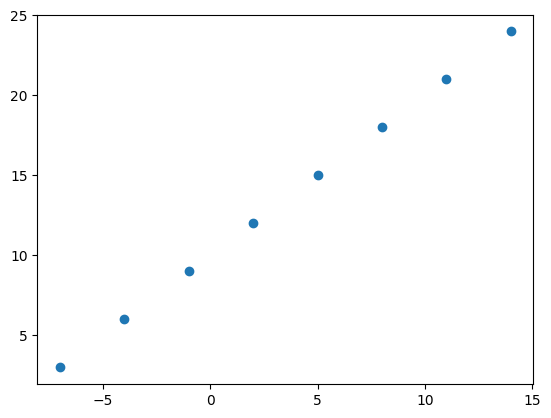

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

#Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

## Input and output shapes

In [3]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [4]:
X[0], y[0]

(-7.0, 3.0)

In [5]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [6]:
# Turn our NumPy arrays into tensors
X = tf.constant(X, dtype=tf.float32)
y = tf.constant(y, dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

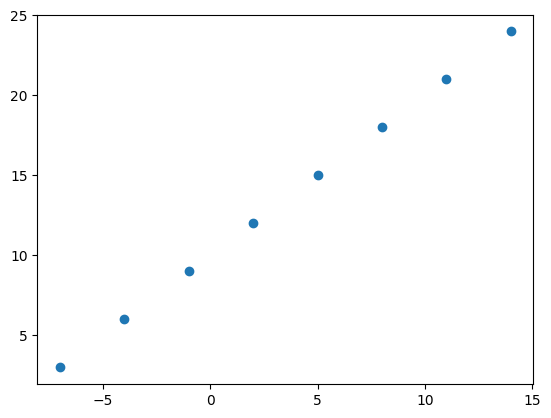

In [8]:
plt.scatter(X, y)

## Steps in modelling with TensorFlow
1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model

2. **Compiling a model** - define the loss fuction (in other words, the function wich tells our model how wrong it is) and the optimizer (telss our model how to improve the patterns its learning) and evaluations metrics (what we can use to interpret the perfomance of our model)

3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels).

In [9]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(1))

#2. Compile the model
model.compile(loss=tf.keras.losses.mae, #mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), #sgd is short for stochastic gradient descent 
              metrics=["mae"])

#3. fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 237ms/step - loss: 20.0130 - mae: 20.0130
Epoch 2/5
1/1 [==============================] - 0s 5ms/step - loss: 19.7318 - mae: 19.7318
Epoch 3/5
1/1 [==============================] - 0s 5ms/step - loss: 19.4505 - mae: 19.4505
Epoch 4/5
1/1 [==============================] - 0s 7ms/step - loss: 19.1693 - mae: 19.1693
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 18.8880 - mae: 18.8880


In [10]:
model.predict([17.0])

1/1 [==============================] - 0s 83ms/step


array([[-19.018414]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hideen layers, change the activation function of each layer.

2. **Compiling a model** - here we migth change the optimization function or perhaps the **learning rate** of the optimization function.

3. **Fitting a model** - here we might fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from)

In [11]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 170ms/step - loss: 13.6729 - mae: 13.6729
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 13.5404 - mae: 13.5404
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 13.4079 - mae: 13.4079
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 13.2754 - mae: 13.2754
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 13.1429 - mae: 13.1429
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 13.0104 - mae: 13.0104
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 12.8779 - mae: 12.8779
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 12.7454 - mae: 12.7454
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 12.6129 - mae: 12.6129
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 12.4804 - mae: 12.4804
Epoch 11/100
1/1 [==============================] - 0s 6m

In [12]:
model.predict([17.0])

1/1 [==============================] - 0s 67ms/step


array([[29.78509]], dtype=float32)

In [13]:
# Let's see if we can make anoter to improve our model

# 1. Create the model (this time with an extra hidden layer with 100 hiden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 263ms/step - loss: 13.5491 - mae: 13.5491
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 12.9974 - mae: 12.9974
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 12.4609 - mae: 12.4609
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 11.9163 - mae: 11.9163
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 11.3624 - mae: 11.3624
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 10.7946 - mae: 10.7946
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 10.2082 - mae: 10.2082
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 9.6066 - mae: 9.6066
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 9.0201 - mae: 9.0201
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 8.4127 - mae: 8.4127
Epoch 11/100
1/1 [==============================] - 0s 10ms/ste

In [14]:
model.predict([17.0])

1/1 [==============================] - 0s 77ms/step


array([[32.788815]], dtype=float32)

In [ ]:
# Keep improving

# 1. Create the model 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50)
])